In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [216]:
# Setting all DataFrames displayed to show all columns
pd.set_option('display.max_columns', None)

player_data = pd.read_csv('Seasons_Stats_2017.csv', sep = ',')
player_data2 = pd.read_csv('Seasons_Stats_1996.csv', sep = ',')
player_data.head()

,Year,Player,Pos,Age,Tm,Games,G,GS,MP,PER,TS%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,eFG%,TRB,AST,STL,BLK,TOV,PF,PTS,College,Championships
0,2017,Alex Abrines,SG,23,OKC,82,68,6,1055,10.1,0.560,15.9,1.2,0.9,2.1,0.095,-0.3,-2.2,-2.5,-0.1,134,341,0.393,0.531,86,40,37,8,33,114,406,0,0
1,2017,Quincy Acy,PF,26,DAL,82,6,0,48,-1.4,0.355,20.0,-0.2,0.0,-0.1,-0.133,-10.1,-6.0,-16.2,-0.2,5,17,0.294,0.324,8,0,0,0,2,9,13,Baylor University,0
2,2017,Quincy Acy,PF,26,BRK,82,32,1,510,13.1,0.587,16.5,0.6,0.5,1.1,0.102,-1.1,-0.7,-1.8,0.0,65,153,0.425,0.542,107,18,14,15,19,58,209,Baylor University,0
3,2017,Steven Adams,C,23,OKC,82,80,80,2389,16.5,0.589,16.2,3.3,3.1,6.4,0.130,-0.7,1.2,0.5,1.5,374,655,0.571,0.571,615,86,88,78,146,195,905,University of Pittsburgh,0
4,2017,Arron Afflalo,SG,31,SAC,82,61,45,1580,9.0,0.559,14.4,1.2,0.2,1.4,0.043,-1.4,-2.0,-3.5,-0.6,185,420,0.440,0.514,125,78,21,7,42,104,515,"University of California, Los Angeles",0


In [146]:
#Creating new data frame
team_player_data = player_data.groupby('Tm').agg({
    'PER': 'mean',
    'FG%': 'mean',
    'eFG%': 'mean',
    'TS%': 'mean',
    'USG%': 'mean',
    'OWS': 'mean',
    'DWS': 'mean',
    'WS': 'mean',
    'WS/48': 'mean',
    'OBPM': 'mean',
    'DBPM': 'mean',
    'BPM': 'mean',
    'VORP': 'mean'
}).reset_index()

# # Display the aggregated team player data
print("2017 Aggregated Advanced Team Stats")
print(team_player_data.sort_values(by = 'WS', ascending = False).head())

#Creating new data frame
team_player_data2 = player_data2.groupby('Tm').agg({
    'PER': 'mean',
    'FG%': 'mean',
    'eFG%': 'mean',
    'TS%': 'mean',
    'USG%': 'mean',
    'OWS': 'mean',
    'DWS': 'mean',
    'WS': 'mean',
    'WS/48': 'mean',
    'OBPM': 'mean',
    'DBPM': 'mean',
    'BPM': 'mean',
    'VORP': 'mean'
}).reset_index()

# # Display the aggregated team player data
print("\n")
print("1996 Aggregated Advanced Team Stats")
print(team_player_data2.sort_values(by = 'WS', ascending = False).head())

2017 Aggregated Advanced Team Stats
     Tm        PER       FG%      eFG%       TS%       USG%       OWS  \
9   GSW  14.582353  0.488059  0.528412  0.558706  17.470588  2.152941   
26  SAS  13.987500  0.469625  0.527937  0.560063  18.362500  1.718750   
28  UTA  14.500000  0.468067  0.521667  0.550600  19.293333  1.620000   
12  LAC  13.500000  0.439667  0.494467  0.529267  21.073333  2.033333   
1   BOS  14.780000  0.472667  0.539667  0.560333  18.400000  1.806667   

         DWS        WS     WS/48      OBPM      DBPM       BPM      VORP  
9   1.847059  3.994118  0.133059 -0.711765  1.176471  0.470588  1.388235  
26  2.043750  3.775000  0.121188 -0.587500  0.925000  0.331250  1.187500  
28  1.900000  3.513333  0.116333 -0.620000  0.673333  0.053333  1.006667  
12  1.420000  3.453333  0.070733 -1.733333  0.293333 -1.440000  1.033333  
1   1.393333  3.206667  0.117267 -0.120000 -0.213333 -0.340000  0.833333  


1996 Aggregated Advanced Team Stats
     Tm        PER       FG%      eFG

In [148]:
features = team_player_data[['PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]

features2 = team_player_data2[['PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]

In [150]:
# Standardizing the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

scaler2 = MinMaxScaler()
scaled_features2 = scaler2.fit_transform(features2)

     Tm        WS
9   GSW  3.994118
26  SAS  3.775000
28  UTA  3.513333
12  LAC  3.453333
1   BOS  3.206667
27  TOR  3.182353
10  HOU  3.072222
15  MIA  2.973333
24  POR  2.733333
29  WAS  2.605556


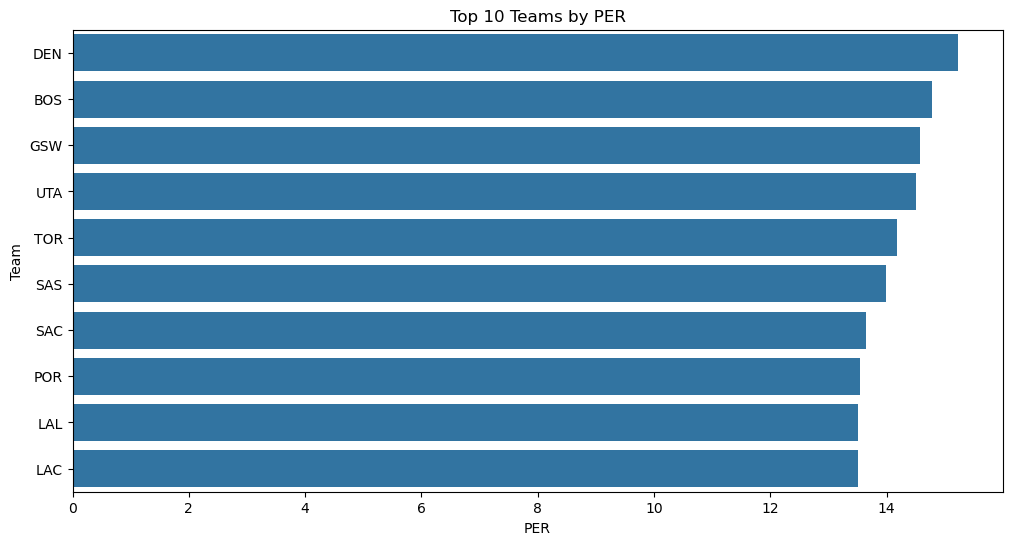

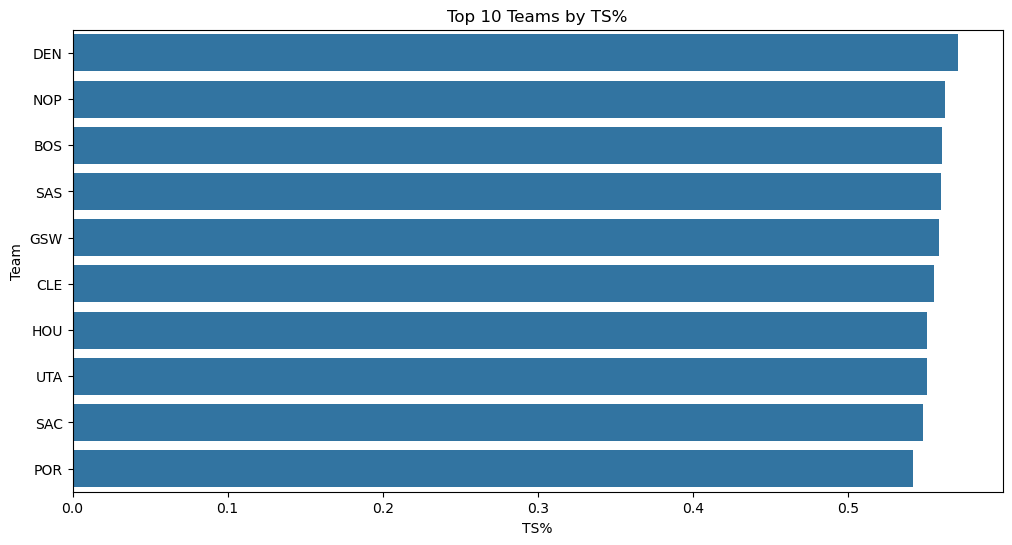

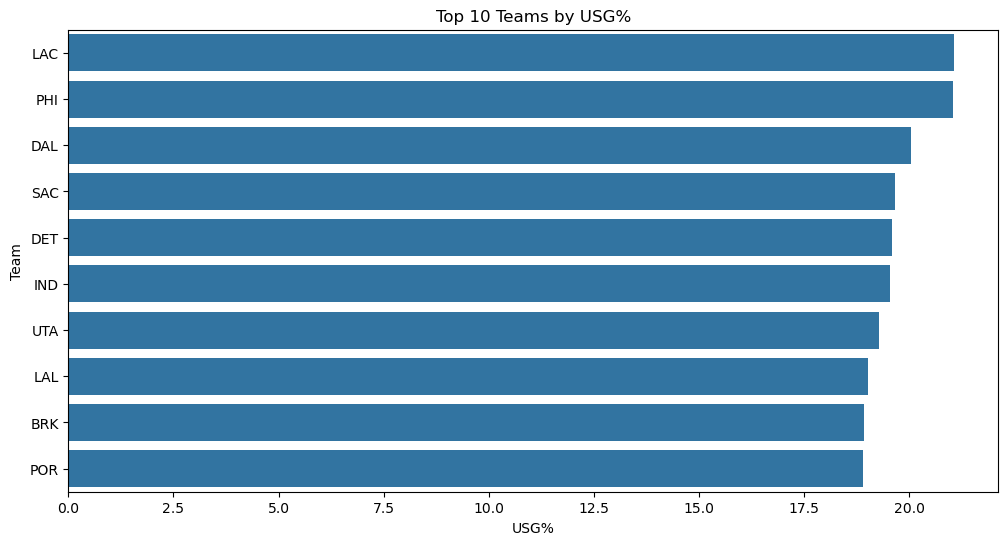

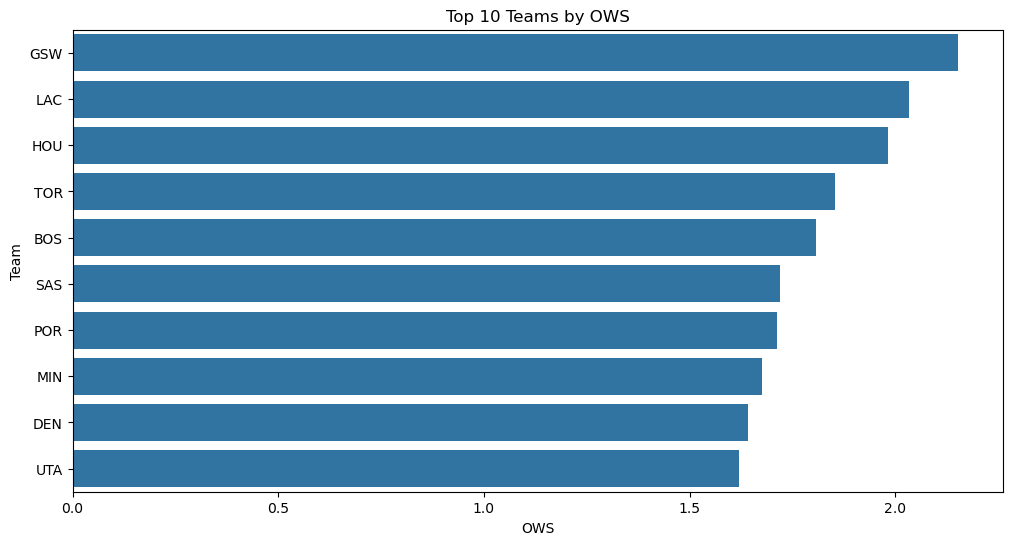

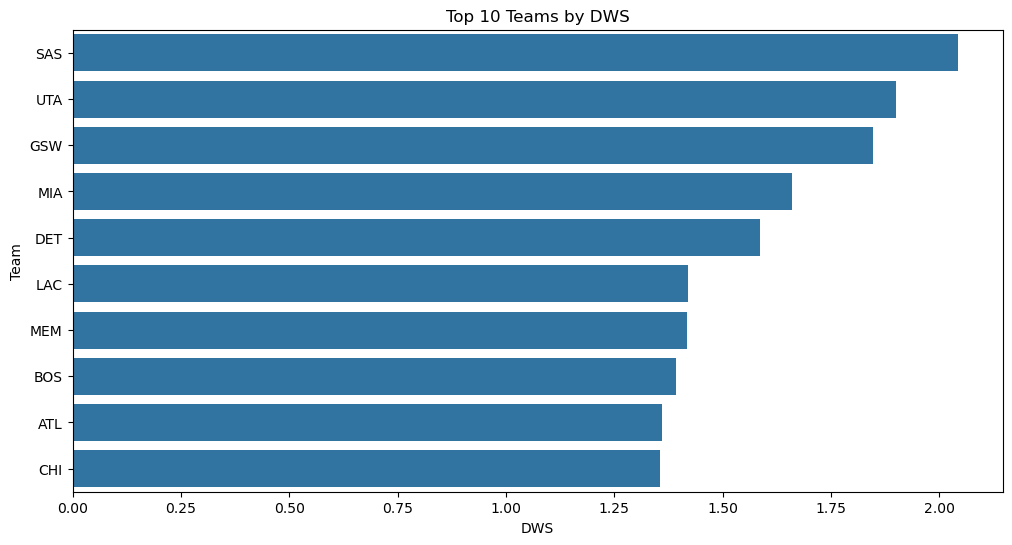

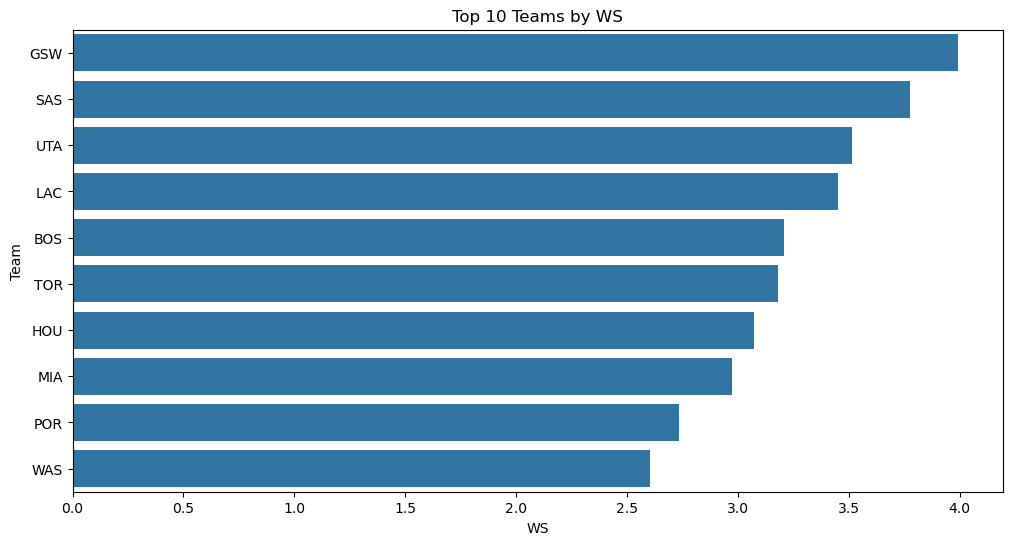

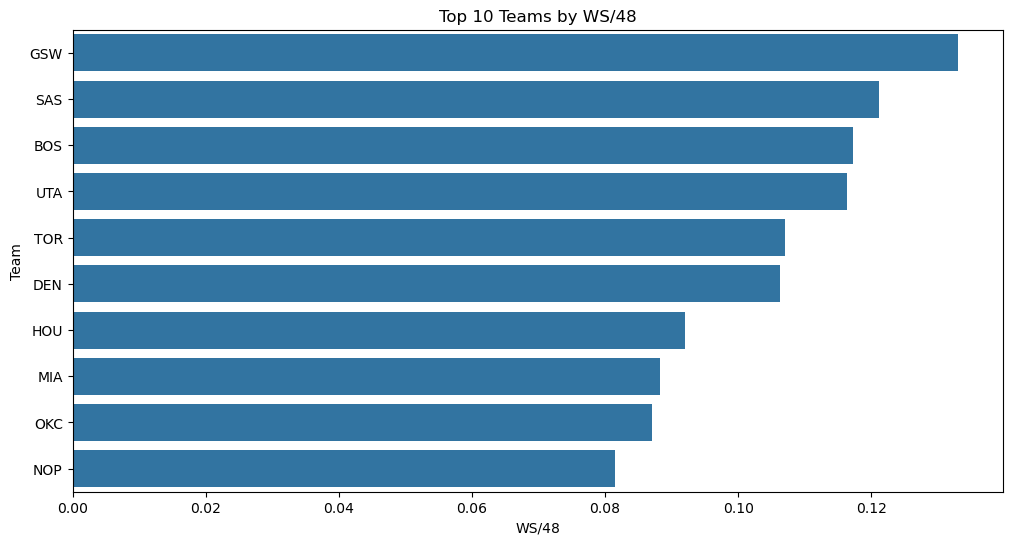

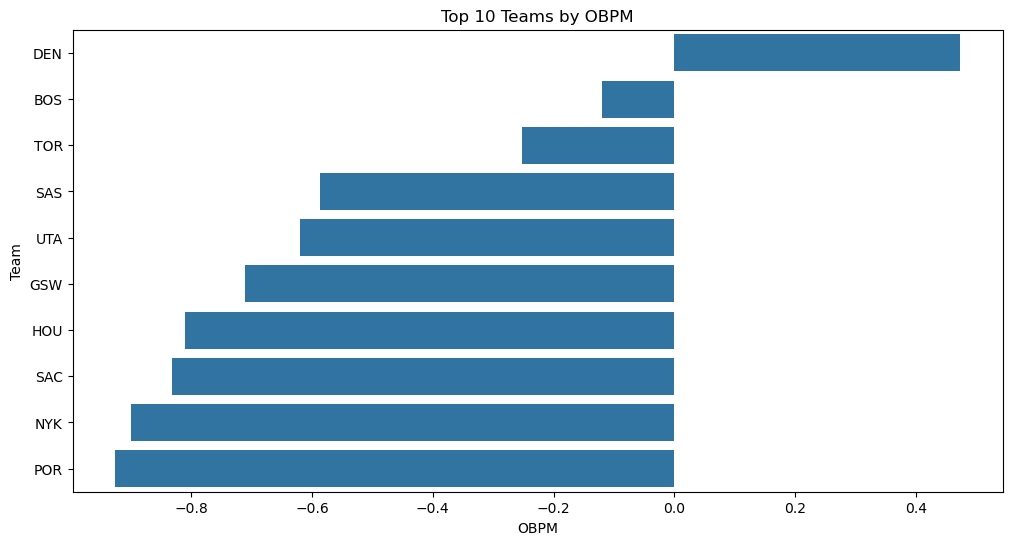

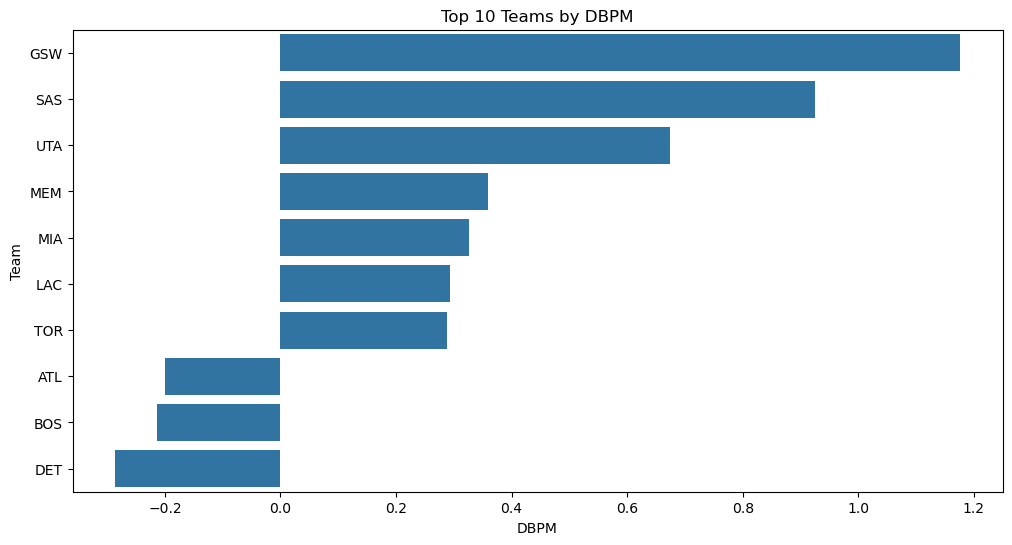

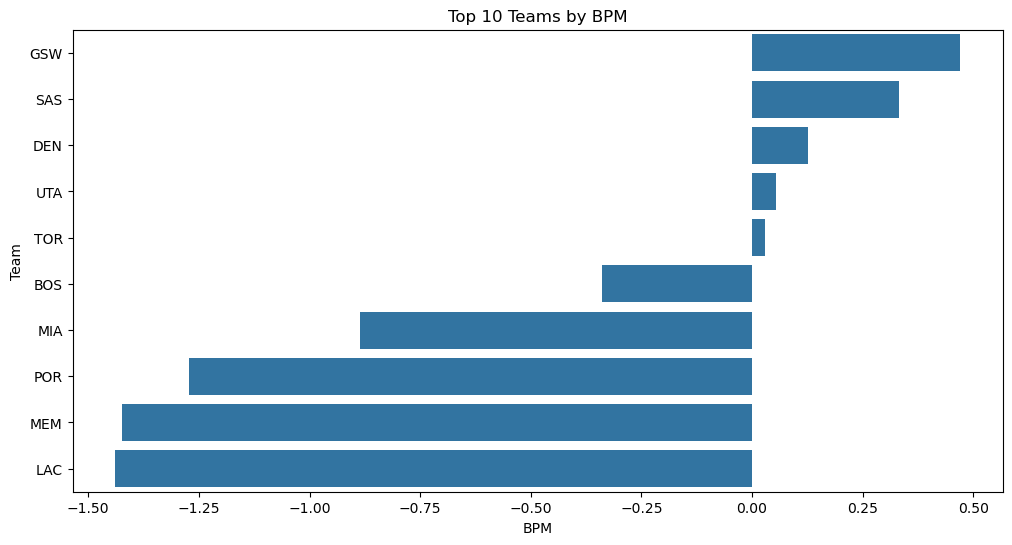

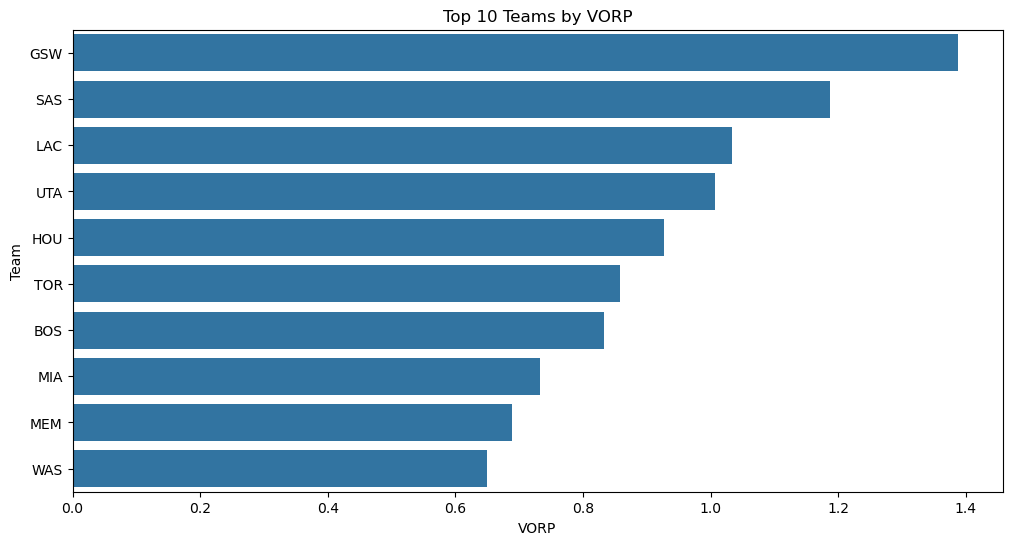

In [212]:
metrics = team_player_data[['PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]

# Create a dictionary to store the top 10 teams for each metric
top_teams = {}

for metric in metrics:
    top_teams[metric] = team_player_data[['Tm', metric]].sort_values(by=metric, ascending=False).head(10)

# Display the top teams for a sample metric
print(top_teams['WS'])

def plot_top_teams(top_teams, metric):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=metric, y='Tm', data=top_teams[metric])
    plt.title(f'Top 10 Teams by {metric}')
    plt.xlabel(metric)
    plt.ylabel('Team')
    plt.show()

# Plot the top 10 teams for each metric
for metric in metrics:
    plot_top_teams(top_teams, metric)

     Tm        WS
3   CHI  5.020000
24  SEA  4.823077
26  UTA  4.178571
23  SAS  3.860000
12  LAL  3.757143
7   DET  3.600000
10  IND  3.500000
4   CLE  3.446667
18  ORL  3.375000
21  POR  3.160000


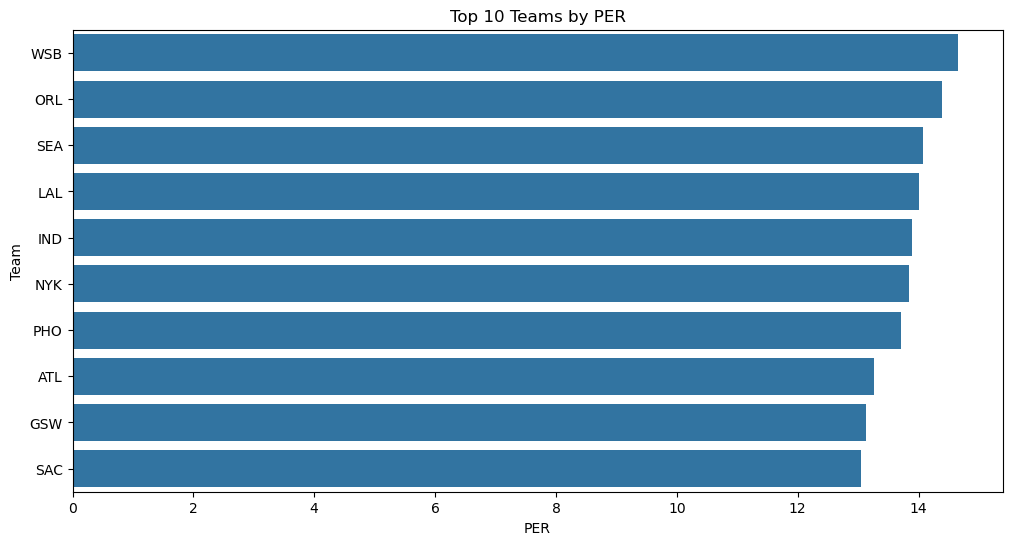

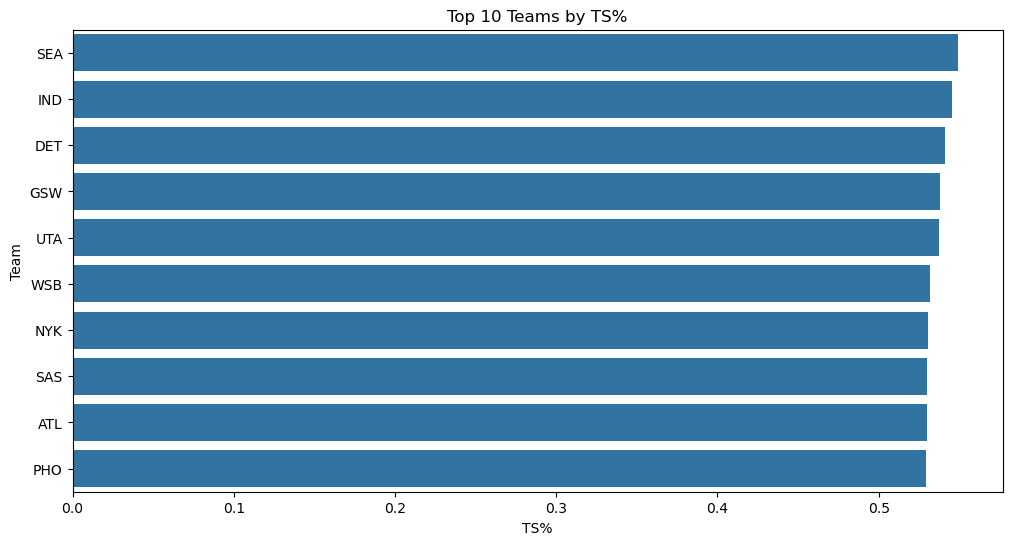

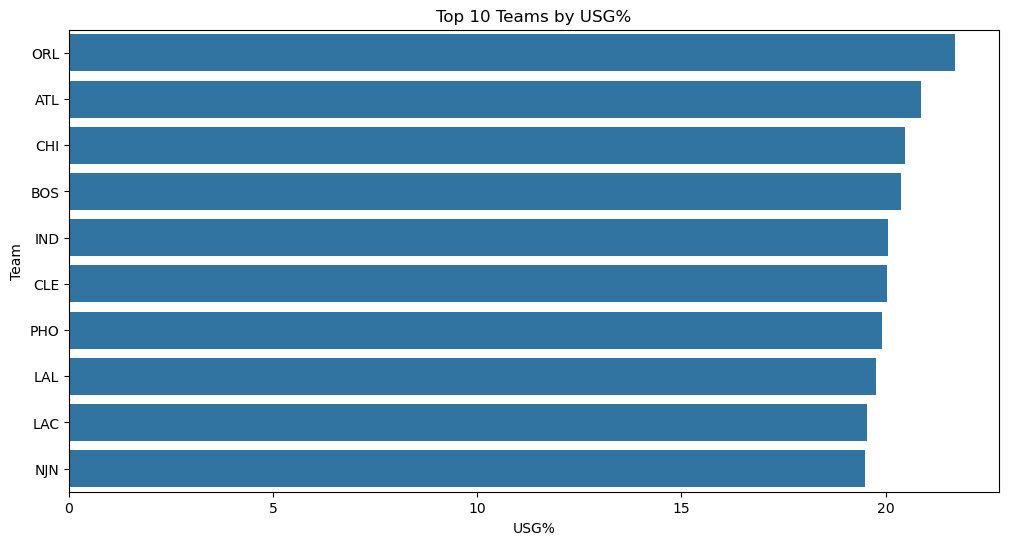

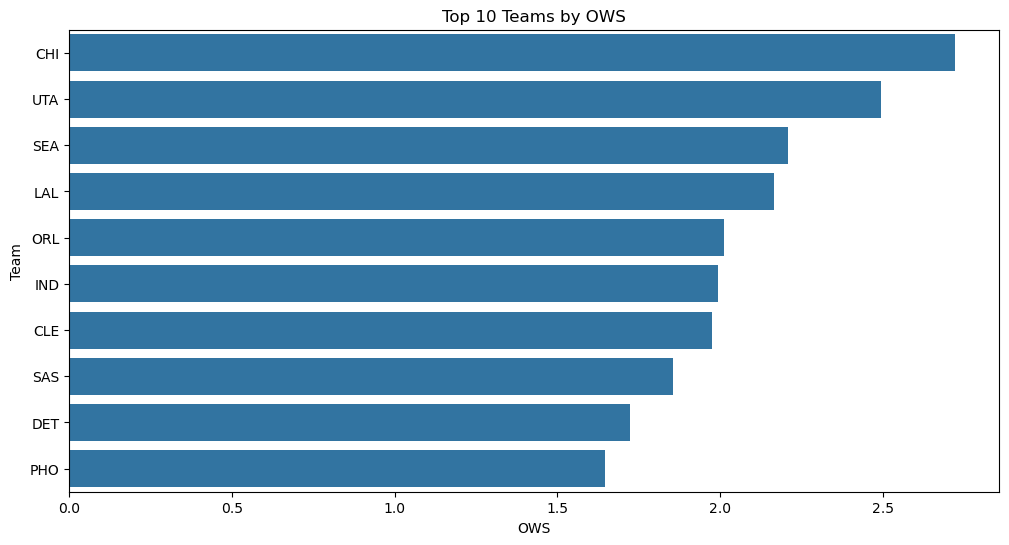

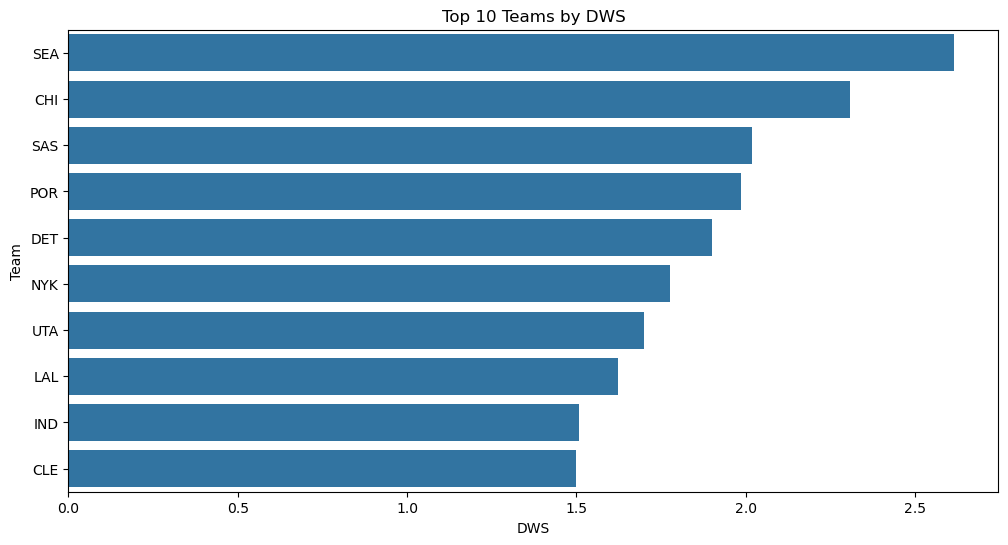

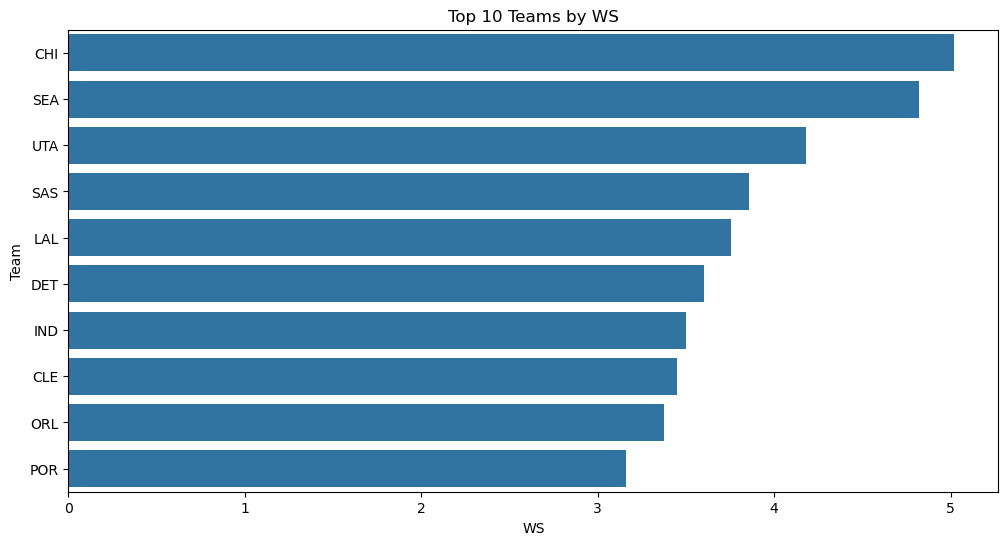

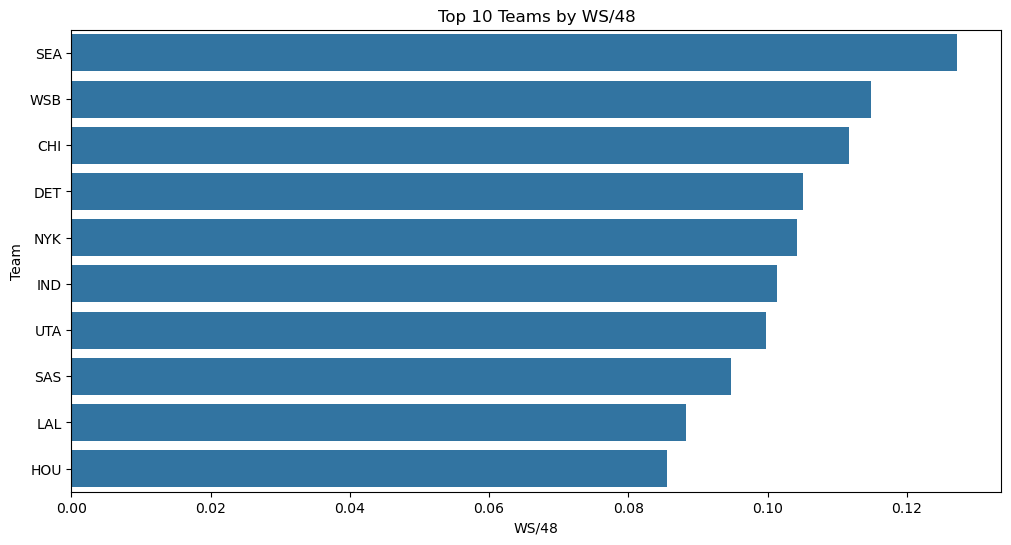

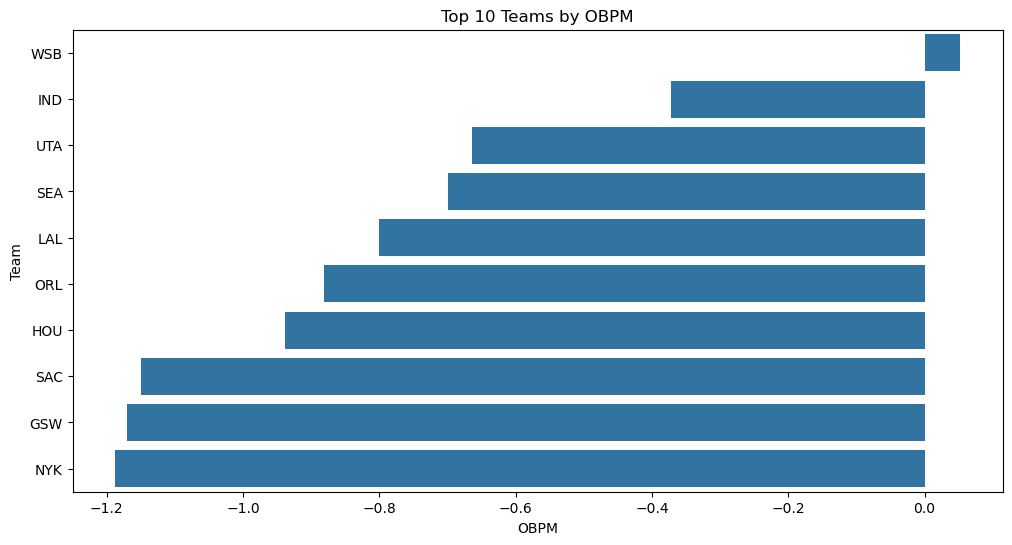

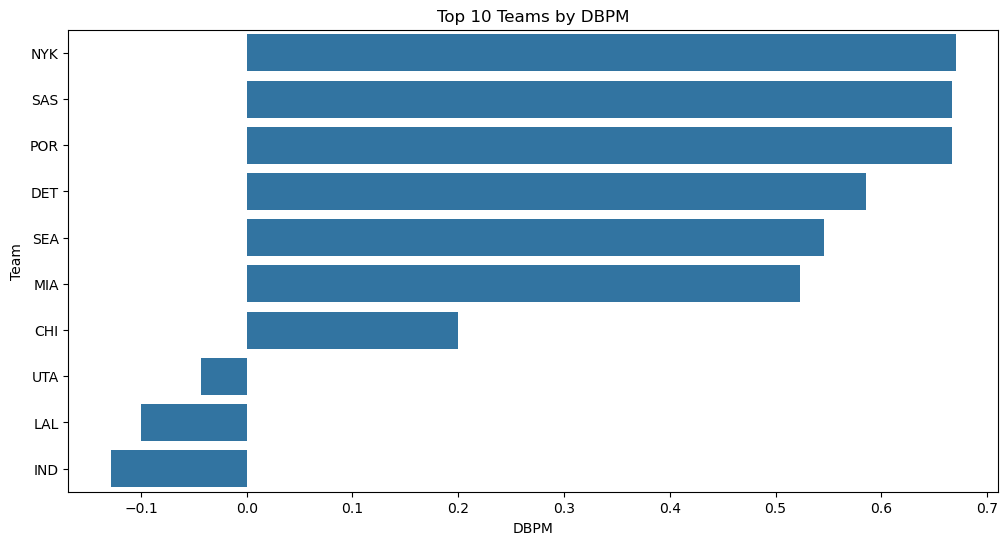

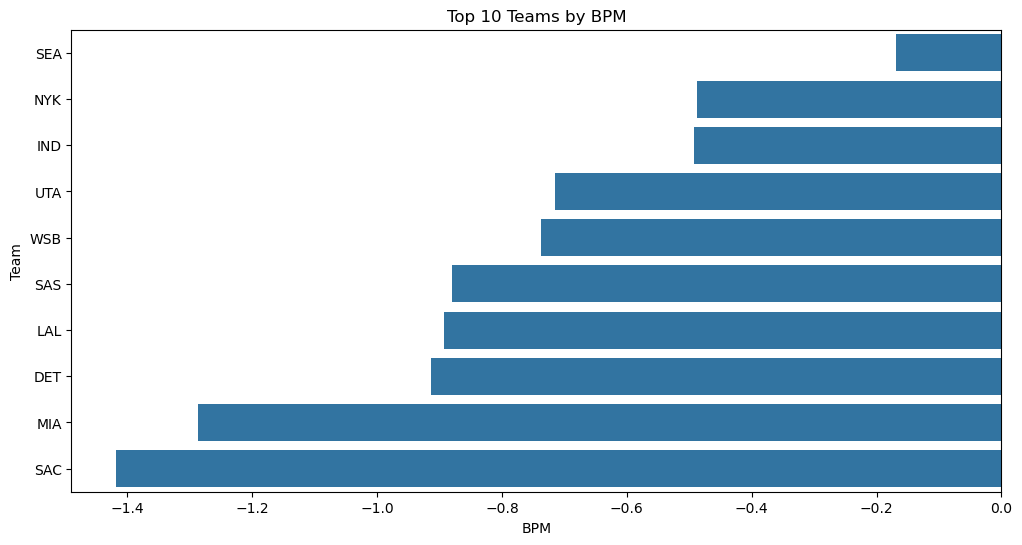

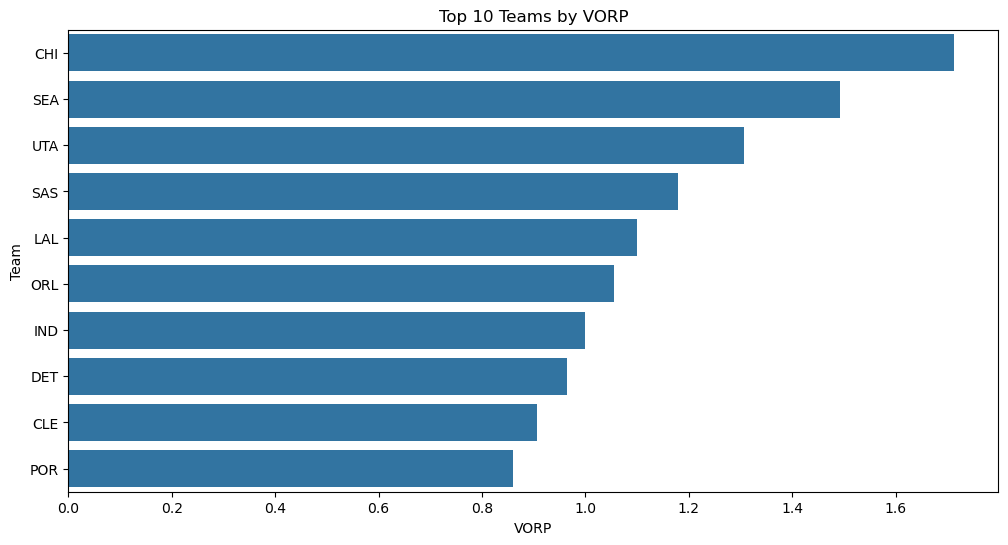

In [214]:
metrics2 = team_player_data2[['PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]

# Create a dictionary to store the top 10 teams for each metric
top_teams2 = {}

for metric in metrics2:
    top_teams2[metric] = team_player_data2[['Tm', metric]].sort_values(by=metric, ascending=False).head(10)

# Display the top teams for a sample metric
print(top_teams2['WS'])

def plot_top_teams(top_teams2, metric):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=metric, y='Tm', data=top_teams2[metric])
    plt.title(f'Top 10 Teams by {metric}')
    plt.xlabel(metric)
    plt.ylabel('Team')
    plt.show()

# Plot the top 10 teams for each metric
for metric in metrics2:
    plot_top_teams(top_teams2, metric)

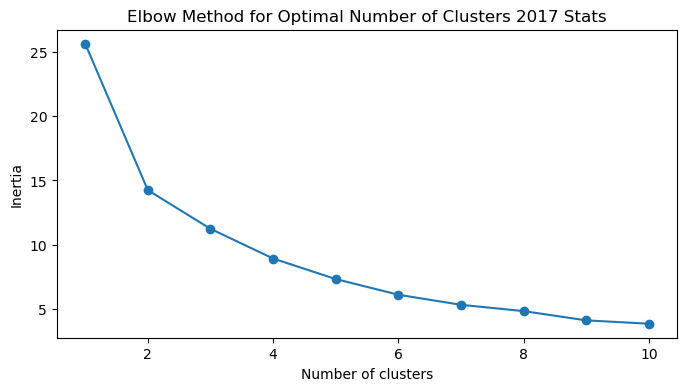

In [114]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters 2017 Stats')
plt.show()

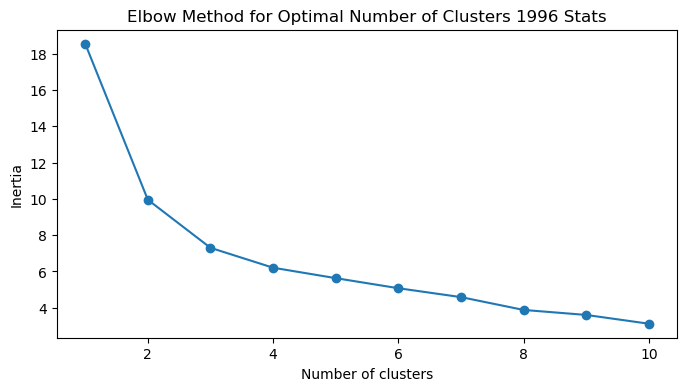

In [158]:
# Determine the optimal number of clusters using the elbow method
inertia2 = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features2)
    inertia2.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters 1996 Stats')
plt.show()

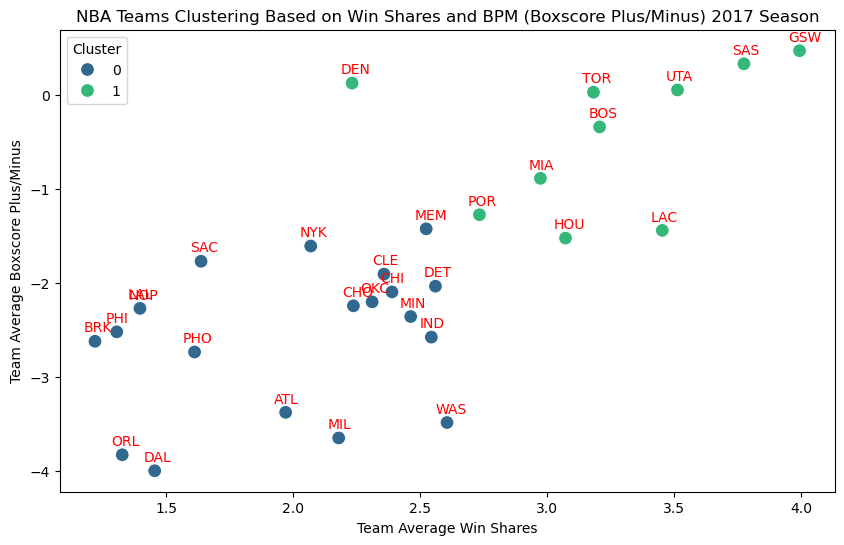

In [184]:
# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
team_player_data['cluster'] = kmeans.fit_predict(scaled_features)

# Plotting the clusters based on WS/48 and VORP
plt.figure(figsize=(10, 6))
for i in range(team_player_data.shape[0]):
    plt.text(x = team_player_data['WS'][i]-0.045, y = team_player_data['BPM'][i]+0.1, s = team_player_data['Tm'][i], fontdict=dict(color='red',size=10))
sns.scatterplot(data=team_player_data, x ='WS', y ='BPM', hue ='cluster', palette ='viridis', s = 100)
plt.title('NBA Teams Clustering Based on Win Shares and BPM (Boxscore Plus/Minus) 2017 Season')
plt.xlabel('Team Average Win Shares')
plt.ylabel('Team Average Boxscore Plus/Minus')
plt.legend(title='Cluster')
plt.show()

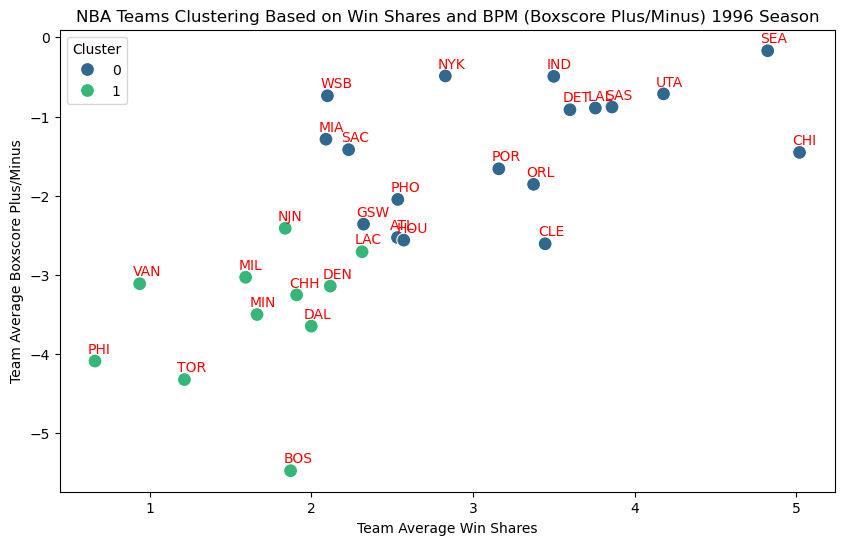

In [186]:
# Apply K-means clustering with the chosen number of clusters
kmeans2 = KMeans(n_clusters=2, random_state=42)
team_player_data2['cluster'] = kmeans2.fit_predict(scaled_features2)

# Plotting the clusters based on WS/48 and VORP
plt.figure(figsize=(10, 6))
for i in range(team_player_data2.shape[0]):
    plt.text(x = team_player_data2['WS'][i]-0.045, y = team_player_data2['BPM'][i]+0.1, s = team_player_data2['Tm'][i], fontdict=dict(color='red',size=10))
sns.scatterplot(data=team_player_data2, x ='WS', y ='BPM', hue ='cluster', palette ='viridis', s = 100)
plt.title('NBA Teams Clustering Based on Win Shares and BPM (Boxscore Plus/Minus) 1996 Season')
plt.xlabel('Team Average Win Shares')
plt.ylabel('Team Average Boxscore Plus/Minus')
plt.legend(title='Cluster')
plt.show()

In [210]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(scaled_features, kmeans.fit_predict(scaled_features))
s_score2 = silhouette_score(scaled_features2, kmeans.fit_predict(scaled_features2))
print("Silhouette Score 1996 Data: ", s_score2)
print("Silhouette Score 2017 Data: ", s_score)

Silhouette Score 1996 Data:  0.35625398539784986
Silhouette Score 2017 Data:  0.3630179491204993
